<a href="https://colab.research.google.com/github/wnsmir/DSBA5/blob/main/Day5%E1%84%91%E1%85%A1%E1%86%AB%E1%84%83%E1%85%A1%E1%84%89%E1%85%B3%E1%84%83%E1%85%A6%E1%84%8B%E1%85%B5%E1%84%90%E1%85%A5%E1%84%87%E1%85%AE%E1%86%AB%E1%84%89%E1%85%A5%E1%86%A8_05%E1%84%83%E1%85%A6%E1%84%8B%E1%85%B5%E1%84%90%E1%85%A5%E1%84%89%E1%85%A1%E1%84%8C%E1%85%A5%E1%86%AB%E1%84%8E%E1%85%A5%E1%84%85%E1%85%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **05 데이터 사전처리**

# 1. 누락 데이터 처리
### 1. 누락 데이터 확인

In [ ]:
# <예제 5-1> 누락 데이터 확인
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import seaborn as sns

# titanic 데이터셋 가져오기
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
# deck 열의 NaN 개수 계산하기
#drpona는 모든 결측치를 삭제해줌
nan_deck = df['deck'].value_counts(dropna=False)
print(nan_deck)


NaN    688
C       59
B       47
D       33
E       32
A       15
F       13
G        4
Name: deck, dtype: int64


In [ ]:
# isnull() 메서드로 누락 데이터 찾기
print(df.head().isnull())

   survived  pclass    sex    age  sibsp  parch   fare  embarked  class  \
0     False   False  False  False  False  False  False     False  False   
1     False   False  False  False  False  False  False     False  False   
2     False   False  False  False  False  False  False     False  False   
3     False   False  False  False  False  False  False     False  False   
4     False   False  False  False  False  False  False     False  False   

     who  adult_male   deck  embark_town  alive  alone  
0  False       False   True        False  False  False  
1  False       False  False        False  False  False  
2  False       False   True        False  False  False  
3  False       False  False        False  False  False  
4  False       False   True        False  False  False  


In [ ]:
# notnull() 메서드로 누락 데이터 찾기
print(df.head().notnull())

   survived  pclass   sex   age  sibsp  parch  fare  embarked  class   who  \
0      True    True  True  True   True   True  True      True   True  True   
1      True    True  True  True   True   True  True      True   True  True   
2      True    True  True  True   True   True  True      True   True  True   
3      True    True  True  True   True   True  True      True   True  True   
4      True    True  True  True   True   True  True      True   True  True   

   adult_male   deck  embark_town  alive  alone  
0        True  False         True   True   True  
1        True   True         True   True   True  
2        True  False         True   True   True  
3        True   True         True   True   True  
4        True  False         True   True   True  


In [ ]:
# isnull() 메서드로 누락 데이터 개수 구하기
print(df.head().isnull().sum(axis=0))

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           3
embark_town    0
alive          0
alone          0
dtype: int64


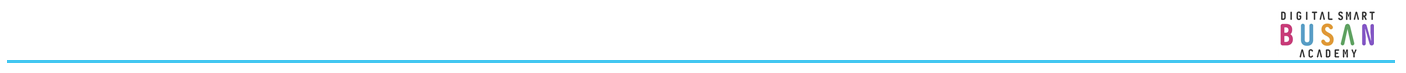

### 2. 누락 데이터 제거


In [ ]:
# <예제 5-2> 누락 데이터 제거
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import seaborn as sns

# titanic 데이터셋 가져오기
df = sns.load_dataset('titanic')

# for 반복문으로 각 열의 NaN 개수 계산하기
missing_df = df.isnull()
for col in missing_df.columns:
    missing_count = missing_df[col].value_counts()    # 각 열의 NaN 개수 파악

    try:
        print(col, ': ', missing_count[True])   # NaN 값이 있으면 개수를 출력
    except:
        print(col, ': ', 0)                     # NaN 값이 없으면 0개 출력


survived :  0
pclass :  0
sex :  0
age :  177
sibsp :  0
parch :  0
fare :  0
embarked :  2
class :  0
who :  0
adult_male :  0
deck :  688
embark_town :  2
alive :  0
alone :  0


* 전체 891명의 승객 중에서 688명의 데크('deck' 열) 데이터가 누락되어 있다.

In [ ]:
# NaN 값이 500개 이상인 열을 모두 삭제 - deck 열(891개 중 688개의 NaN 값)
df_thresh = df.dropna(axis=1, thresh=500)
print(df_thresh.columns)

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')


In [ ]:
# age 열에 나이 데이터가 없는 모든 행을 삭제 - age 열(891개 중 177개의 NaN 값)
df_age = df.dropna(subset=['age'], how='any', axis=0)
print(len(df_age))

714


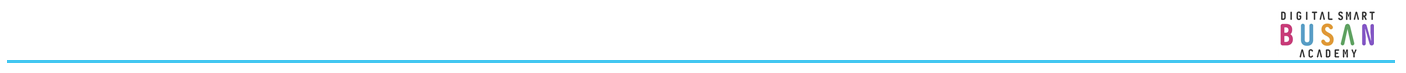

### 3. 누락 데이터 치환

In [ ]:
# <예제 5-3> 평균으로 누락 데이터 바꾸기
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import seaborn as sns

# titanic 데이터셋 가져오기
df = sns.load_dataset('titanic')

# age 열의 첫 10개 데이터 출력 (5 행에 NaN 값)
print(df['age'].head(10))
print('\n')

# age 열의 NaN값을 다른 나이 데이터의 평균으로 변경하기
mean_age = df['age'].mean(axis=0)   # age 열의 평균 계산 (NaN 값 제외)
df['age'].fillna(mean_age, inplace=True)

# age 열의 첫 10개 데이터 출력 (5 행에 NaN 값이 평균으로 대체)
print(df['age'].head(10))

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: age, dtype: float64


0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: age, dtype: float64


In [ ]:
# <예제 5-4> 가장 많이 나타나는 값으로 바꾸기
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import seaborn as sns

# titanic 데이터셋 가져오기
df = sns.load_dataset('titanic')

# embark_town 열의 829행의 NaN 데이터 출력
print(df['embark_town'][825:830])
print('\n')

# embark_town 열의 NaN값을 승선도시 중에서 가장 많이 출현한 값으로 치환하기
most_freq = df['embark_town'].value_counts(dropna=True).idxmax()
print(most_freq)
print('\n')

df['embark_town'].fillna(most_freq, inplace=True)

# embark_town 열 829행의 NaN 데이터 출력 (NaN 값이 most_freq 값으로 대체)
print(df['embark_town'][825:830])

825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829            NaN
Name: embark_town, dtype: object


Southampton


825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829    Southampton
Name: embark_town, dtype: object


* 누락 데이터가 NaN으로 표시되지 않은 경우
  * 에를 들면 숫자 0이나 문자 '-', '?'
  * 판다스에서 누락 데이커를 다루려면 replace() 메소드를 활용하여 NumPy에서 지원하는 np.nan으로 변경

In [ ]:
# <예제 5-5> 이웃하고 있는 값으로 바꾸기
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import seaborn as sns

# titanic 데이터셋 가져오기
df = sns.load_dataset('titanic')

# embark_town 열의 829행의 NaN 데이터 출력
print(df['embark_town'][825:830])
print('\n')

# embark_town 열의 NaN값을 바로 앞에 있는 828행의 값으로 변경하기
df['embark_town'].fillna(method='ffill', inplace=True)
print(df['embark_town'][825:830])

825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829            NaN
Name: embark_town, dtype: object


825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829     Queenstown
Name: embark_town, dtype: object


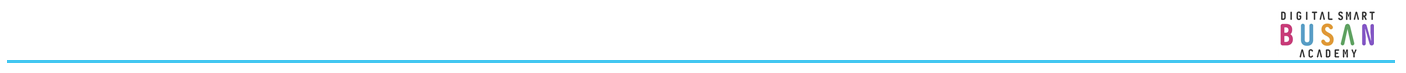

# 2. 중복 데이터 처리
### 1. 중복 데이터 확인
* duplicated() 메소드를 이용
  * 전에 나온 행들과 비교하여 중복되는 행이면 True
  * 처음 나오는 행이면 False를 반환

In [ ]:
# <예제 5-6> 중복 데이터 확인
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import pandas as pd

# 중복 데이터를 갖는 데이터프레임 만들기
df = pd.DataFrame({'c1':['a', 'a', 'b', 'a', 'b'],
                  'c2':[1, 1, 1, 2, 2],
                  'c3':[1, 1, 2, 2, 2]})
print(df)
print('\n')

# 데이터프레임 전체 행 데이터 중에서 중복값 찾기
df_dup = df.duplicated()
print(df_dup)

  c1  c2  c3
0  a   1   1
1  a   1   1
2  b   1   2
3  a   2   2
4  b   2   2


0    False
1     True
2    False
3    False
4    False
dtype: bool


In [ ]:
# 데이터프레임의 특정 열 데이터에서 중복값 찾기
col_dup = df['c2'].duplicated()
print(col_dup)

0    False
1     True
2     True
3    False
4     True
Name: c2, dtype: bool


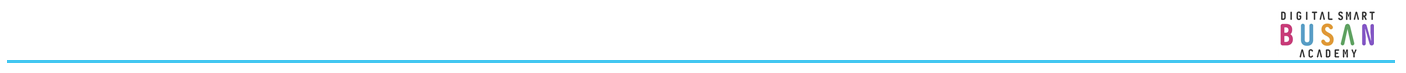

### 2. 중복 데이터 제거
* drop_duplicates() 메소드의 subset 옵션에 '열 이름의 리스트'를 전달할 수 있다.

In [ ]:
# <예제 5-7> 중복 데이터 제거
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import pandas as pd

# 중복 데이터를 갖는 데이터프레임 만들기
df = pd.DataFrame({'c1':['a', 'a', 'b', 'a', 'b'],
                  'c2':[1, 1, 1, 2, 2],
                  'c3':[1, 1, 2, 2, 2]})
print(df)
print('\n')

# 데이터프레임에서 중복 행을 제거
df2 = df.drop_duplicates()
print(df2)

  c1  c2  c3
0  a   1   1
1  a   1   1
2  b   1   2
3  a   2   2
4  b   2   2


  c1  c2  c3
0  a   1   1
2  b   1   2
3  a   2   2
4  b   2   2


In [ ]:
# c2, c3열을 기준으로 중복 행을 제거
df3 = df.drop_duplicates(subset=['c2', 'c3'])
print(df3)

  c1  c2  c3
0  a   1   1
2  b   1   2
3  a   2   2


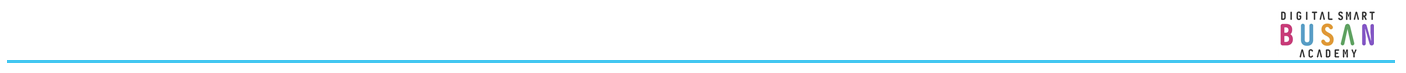

# 3. 데이터 표준화
## 3-1 단위 환산
* mpg(mile per gallon)를 kpl(kilometer per liter)로 변환
  * 1mpg(영미권에서 사용하는 '갤런당 마일(mile per gallen)')= 0.425km/L(리터당 킬로미터)

In [ ]:
# <예제 5-8> 단위 환산
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import pandas as pd

# read_csv() 함수로 df 생성
df = pd.read_csv('./auto-mpg.csv', header=None)

# 열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']
print(df.head(3))
print('\n')

# mpg(mile per gallon)를 kpl(kilometer per liter)로 변환 (mpg_to_kpl = 0.425)
mpg_to_kpl = 1.60934 / 3.78541

# mpg 열에 0.425를 곱한 결과를 새로운 열(kpl)에 추가
df['kpl'] = df['mpg'] * mpg_to_kpl
print(df.head(3))
print('\n')

# kpl 열을 소수점 아래 둘째 자리에서 반올림
df['kpl'] = df['kpl'].round(2)
print(df.head(3))

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  


    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   

   origin                       name       kpl  
0       1  chevrolet chevelle malibu  7.652571  
1       1          buick skylark 320  6.377143  
2       1         plymouth satellite  7.65257

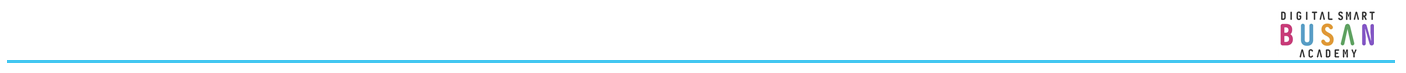

## 3-2 자료형 변환
* 엔진 출력 'horsepower' 열은 숫자형이 적절
* 출시연도를 나타내는 'model year' 열과 출시국가를 뜻하는 'orgin' 열은 카테고리를 나타내는 범주형이 적절

In [ ]:
# <예제 5-9> 자료형 변환
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import pandas as pd

# read_csv() 함수로 df 생성
df = pd.read_csv('./auto-mpg.csv', header=None)

# 열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']

# 각 열의 자료형 확인
print(df.dtypes)

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model year        int64
origin            int64
name             object
dtype: object


In [ ]:
# horsepower 열의 고유값 확인
print(df['horsepower'].unique())

['130.0' '165.0' '150.0' '140.0' '198.0' '220.0' '215.0' '225.0' '190.0'
 '170.0' '160.0' '95.00' '97.00' '85.00' '88.00' '46.00' '87.00' '90.00'
 '113.0' '200.0' '210.0' '193.0' '?' '100.0' '105.0' '175.0' '153.0'
 '180.0' '110.0' '72.00' '86.00' '70.00' '76.00' '65.00' '69.00' '60.00'
 '80.00' '54.00' '208.0' '155.0' '112.0' '92.00' '145.0' '137.0' '158.0'
 '167.0' '94.00' '107.0' '230.0' '49.00' '75.00' '91.00' '122.0' '67.00'
 '83.00' '78.00' '52.00' '61.00' '93.00' '148.0' '129.0' '96.00' '71.00'
 '98.00' '115.0' '53.00' '81.00' '79.00' '120.0' '152.0' '102.0' '108.0'
 '68.00' '58.00' '149.0' '89.00' '63.00' '48.00' '66.00' '139.0' '103.0'
 '125.0' '133.0' '138.0' '135.0' '142.0' '77.00' '62.00' '132.0' '84.00'
 '64.00' '74.00' '116.0' '82.00']


In [ ]:
# 누락 데이터('?') 삭제
import numpy as np
df['horsepower'].replace('?', np.nan, inplace=True)      # '?'을 np.nan으로 변경
df.dropna(subset=['horsepower'], axis=0, inplace=True)   # 누락데이터 행을 삭제
df['horsepower'] = df['horsepower'].astype('float')      # 문자열을 실수형으로 변환

# horsepower 열의 자료형 확인
print(df['horsepower'].dtypes)

In [ ]:
# origin 열의 고유값 확인
print(df['origin'].unique())

# 정수형 데이터를 문자형 데이터로 변환
df['origin'].replace({1:'USA', 2:'EU', 3:'JAPAN'}, inplace=True)

# origin 열의 고유값과 자료형 확인
print(df['origin'].unique())
print(df['origin'].dtypes)

[1 3 2]
['USA' 'JAPAN' 'EU']
object


In [ ]:
# origin 열의 문자열 자료형을 범주형으로 변환
df['origin'] = df['origin'].astype('category')
print(df['origin'].dtypes)

# 범주형을 문자열로 다시 변환
df['origin'] = df['origin'].astype('str')
print(df['origin'].dtypes)

category
object


In [ ]:
# model year 열의 정수형을 범주형으로 변환
print(df['model year'].sample(3))
df['model year'] = df['model year'].astype('category')
print(df['model year'].sample(3))

343    81
163    75
391    82
Name: model year, dtype: int64
390    82
142    74
286    79
Name: model year, dtype: category
Categories (13, int64): [70, 71, 72, 73, ..., 79, 80, 81, 82]


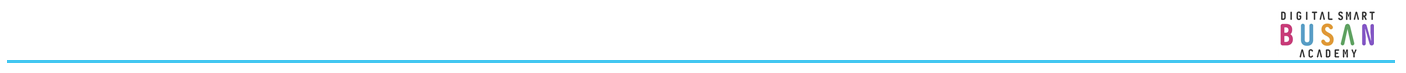

# 4, 범주형(카테고리) 데이터 처리
## 4-1 구간 분할

* [그림] 구간 분할 경계값 구하기

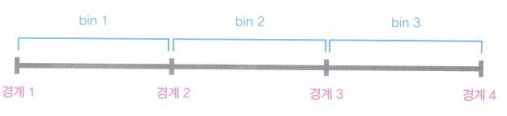

* 'horsepower' 열은 엔진 출력 --> '저출력', '보통출력', '고출력' 등 구간으로 나누어서 표시하는 것이 효율적
  * 3개의 구간으로 구분하려면 총 4개의 경계값이 필요



In [ ]:
# <예제 5-10> 데이터 구간 분할
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import pandas as pd
import numpy as np

# read_csv() 함수로 df 생성
df = pd.read_csv('./auto-mpg.csv', header=None)

# 열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']

# horsepower 열의 누락 데이터('?') 삭제하고 실수형으로 변환
df['horsepower'].replace('?', np.nan, inplace=True)      # '?'을 np.nan으로 변경
df.dropna(subset=['horsepower'], axis=0, inplace=True)   # 누락데이터 행을 삭제
df['horsepower'] = df['horsepower'].astype('float')      # 문자열을 실수형으로 변환

# np.histogram 함수로 3개의 bin으로 나누는 경계 값의 리스트 구하기
count, bin_dividers = np.histogram(df['horsepower'], bins=3)
print(bin_dividers)

[ 46.         107.33333333 168.66666667 230.        ]


In [ ]:
# 3개의 bin에 이름 지정
bin_names = ['저출력', '보통출력', '고출력']

# pd.cut 함수로 각 데이터를 3개의 bin에 할당
df['hp_bin'] = pd.cut(x=df['horsepower'],     # 데이터 배열
                      bins=bin_dividers,      # 경계 값 리스트
                      labels=bin_names,       # bin 이름
                      include_lowest=True)    # 첫 경계값 포함

# horsepower 열, hp_bin 열의 첫 15행을 출력
print(df[['horsepower', 'hp_bin']].head(15))

    horsepower hp_bin
0        130.0   보통출력
1        165.0   보통출력
2        150.0   보통출력
3        150.0   보통출력
4        140.0   보통출력
5        198.0    고출력
6        220.0    고출력
7        215.0    고출력
8        225.0    고출력
9        190.0    고출력
10       170.0    고출력
11       160.0   보통출력
12       150.0   보통출력
13       225.0    고출력
14        95.0    저출력


* 'horsepower'열의 숫자형 연속 데이터를 'hp_bin' 열의 범주형 데이터로 변환 --> 컴퓨터가 인식 가능한 입력값으로 변환(숫자 0또는 1로 표현되는 더미 변수를 사용)

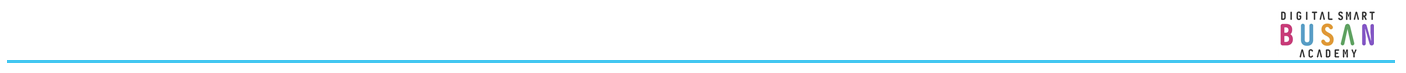

## 4-2 더미 변수(dummy variable)- 어떤 특성(feature)이 있는지 없는지 여부만을 표시
  * 범주형 데이터를 컴퓨터가 인식할 수 있도록 숫자 0과 1로만 구성되는 원핫벡터(one hot vector)로 변환한다고 해서 원핫인코딩(one-hot-encoding)이라고도 부름
  * 판다스 get_dummies() 함수를 사용

In [ ]:
# <예제 5-11> 더미 변수
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import pandas as pd
import numpy as np

# read_csv() 함수로 df 생성
df = pd.read_csv('./auto-mpg.csv', header=None)

# 열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']

# horsepower 열의 누락 데이터('?') 삭제하고 실수형으로 변환
df['horsepower'].replace('?', np.nan, inplace=True)      # '?'을 np.nan으로 변경
df.dropna(subset=['horsepower'], axis=0, inplace=True)   # 누락데이터 행을 삭제
df['horsepower'] = df['horsepower'].astype('float')      # 문자열을 실수형으로 변환

# np.histogram 으로 3개의 bin으로 나누는 경계 값의 리스트 구하기
count, bin_dividers = np.histogram(df['horsepower'], bins=3)

# 3개의 bin에 이름 지정
bin_names = ['저출력', '보통출력', '고출력']

# pd.cut 으로 각 데이터를 3개의 bin에 할당
df['hp_bin'] = pd.cut(x=df['horsepower'],     # 데이터 배열
                      bins=bin_dividers,      # 경계 값 리스트
                      labels=bin_names,       # bin 이름
                      include_lowest=True)    # 첫 경계값 포함

# hp_bin 열의 범주형 데이터를 더미 변수로 변환
horsepower_dummies = pd.get_dummies(df['hp_bin'])
print(horsepower_dummies.head(15))

    저출력  보통출력  고출력
0     0     1    0
1     0     1    0
2     0     1    0
3     0     1    0
4     0     1    0
5     0     0    1
6     0     0    1
7     0     0    1
8     0     0    1
9     0     0    1
10    0     0    1
11    0     1    0
12    0     1    0
13    0     0    1
14    1     0    0


In [ ]:
# <예제 5-12> 원핫인코딩
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import pandas as pd
import numpy as np

# read_csv() 함수로 df 생성
df = pd.read_csv('./auto-mpg.csv', header=None)

# 열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']

# horsepower 열의 누락 데이터('?') 삭제하고 실수형으로 변환
df['horsepower'].replace('?', np.nan, inplace=True)      # '?'을 np.nan으로 변경
df.dropna(subset=['horsepower'], axis=0, inplace=True)   # 누락데이터 행을 삭제
df['horsepower'] = df['horsepower'].astype('float')      # 문자열을 실수형으로 변환

# np.histogram 으로 3개의 bin으로 나누는 경계 값의 리스트 구하기
count, bin_dividers = np.histogram(df['horsepower'], bins=3)

# 3개의 bin에 이름 지정
bin_names = ['저출력', '보통출력', '고출력']

# pd.cut 으로 각 데이터를 3개의 bin에 할당
df['hp_bin'] = pd.cut(x=df['horsepower'],     # 데이터 배열
                      bins=bin_dividers,      # 경계 값 리스트
                      labels=bin_names,       # bin 이름
                      include_lowest=True)    # 첫 경계값 포함

# sklern 라이브러리 불러오기
from sklearn import preprocessing

# 전처리를 위한 encoder 객체 만들기
label_encoder = preprocessing.LabelEncoder()       # label encoder 생성
onehot_encoder = preprocessing.OneHotEncoder()   # one hot encoder 생성

# label encoder로 문자열 범주를 숫자형 범주로 변환
onehot_labeled = label_encoder.fit_transform(df['hp_bin'].head(15))
print(onehot_labeled)
print(type(onehot_labeled))

# 2차원 행렬로 형태 변경
onehot_reshaped = onehot_labeled.reshape(len(onehot_labeled), 1)
print(onehot_reshaped)
print(type(onehot_reshaped))

# 희소행렬로 변환
onehot_fitted = onehot_encoder.fit_transform(onehot_reshaped)
print(onehot_fitted)
print(type(onehot_fitted))

[1 1 1 1 1 0 0 0 0 0 0 1 1 0 2]
<class 'numpy.ndarray'>
[[1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [2]]
<class 'numpy.ndarray'>
  (0, 1)	1.0
  (1, 1)	1.0
  (2, 1)	1.0
  (3, 1)	1.0
  (4, 1)	1.0
  (5, 0)	1.0
  (6, 0)	1.0
  (7, 0)	1.0
  (8, 0)	1.0
  (9, 0)	1.0
  (10, 0)	1.0
  (11, 1)	1.0
  (12, 1)	1.0
  (13, 0)	1.0
  (14, 2)	1.0
<class 'scipy.sparse._csr.csr_matrix'>


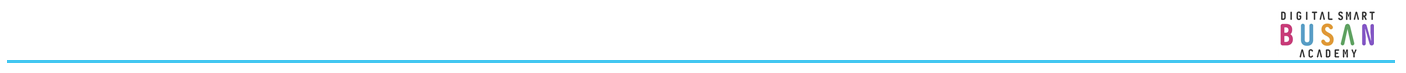

# 5. 정규화(normalization)
* 각 열(변수)에 속하는 데이터 값을 동일한 크기 기준으로 나눈 비율로 나타내는 것

* (1) 각 열(변수)의 데이터를 해당 열의 최댓값(의 절댓값)으로 나누는 방법(가장 큰 값은 최댓값 자기자신을 나눈 1)

In [ ]:
# <예제 5-13> 정규화
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import pandas as pd
import numpy as np

# read_csv() 함수로 df 생성
df = pd.read_csv('./auto-mpg.csv', header=None)

# 열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']

# horsepower 열의 누락 데이터('?') 삭제하고 실수형으로 변환
df['horsepower'].replace('?', np.nan, inplace=True)      # '?'을 np.nan으로 변경
df.dropna(subset=['horsepower'], axis=0, inplace=True)   # 누락데이터 행을 삭제
df['horsepower'] = df['horsepower'].astype('float')      # 문자열을 실수형으로 변환

# horsepower 열의 통계 요약정보로 최대값(max)을 확인
print(df.horsepower.describe())
print('\n')

# horsepower 열의 최대값의 절대값으로 모든 데이터를 나눠서 저장
df.horsepower = df.horsepower / abs(df.horsepower.max())

print(df.horsepower.head())
print('\n')
print(df.horsepower.describe())

count    392.000000
mean     104.469388
std       38.491160
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      230.000000
Name: horsepower, dtype: float64


0    0.565217
1    0.717391
2    0.652174
3    0.652174
4    0.608696
Name: horsepower, dtype: float64


count    392.000000
mean       0.454215
std        0.167353
min        0.200000
25%        0.326087
50%        0.406522
75%        0.547826
max        1.000000
Name: horsepower, dtype: float64


* (2) 각 열(변수)의 데이터 중에서 최댓값(max)과 최솟값(min)을 뺀 값으로 나누는 방법
  * 각 열 데이터에서 해당 열의 최솟값을 뺀 값을 분자로 하고, 해당 열의 최댓값과 최솟값의 차를 분포로 하는 수를 계산(최소 0부터 최대 1 사이의 범위로 변환)

In [ ]:
# <예제 5-14> 정규화
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import pandas as pd
import numpy as np

# read_csv() 함수로 df 생성
df = pd.read_csv('./auto-mpg.csv', header=None)

# 열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']

# horsepower 열의 누락 데이터('?') 삭제하고 실수형으로 변환
df['horsepower'].replace('?', np.nan, inplace=True)      # '?'을 np.nan으로 변경
df.dropna(subset=['horsepower'], axis=0, inplace=True)   # 누락데이터 행을 삭제
df['horsepower'] = df['horsepower'].astype('float')      # 문자열을 실수형으로 변환

# horsepower 열의 통계 요약정보로 최대값(max)과 최소값(min)을 확인
print(df.horsepower.describe())
print('\n')

# horsepower 열의 최대값의 절대값으로 모든 데이터를 나눠서 저장
min_x = df.horsepower - df.horsepower.min()
min_max = df.horsepower.max() - df.horsepower.min()
df.horsepower = min_x / min_max

print(df.horsepower.head())
print('\n')
print(df.horsepower.describe())

count    392.000000
mean     104.469388
std       38.491160
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      230.000000
Name: horsepower, dtype: float64


0    0.456522
1    0.646739
2    0.565217
3    0.565217
4    0.510870
Name: horsepower, dtype: float64


count    392.000000
mean       0.317768
std        0.209191
min        0.000000
25%        0.157609
50%        0.258152
75%        0.434783
max        1.000000
Name: horsepower, dtype: float64


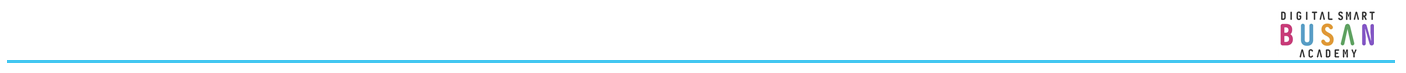

# 6. 시계열 데이터
* 판다스의 시간 표시 방식 중에서 시계열 데이터 표현에 자주 이용되는 두 가지 유형
  * 특정한 시점을 기록하는 Timestamp와 두 시점 사이의 일정한 기간을 나타내는 Period

* [그림] 판다스 시간 표시

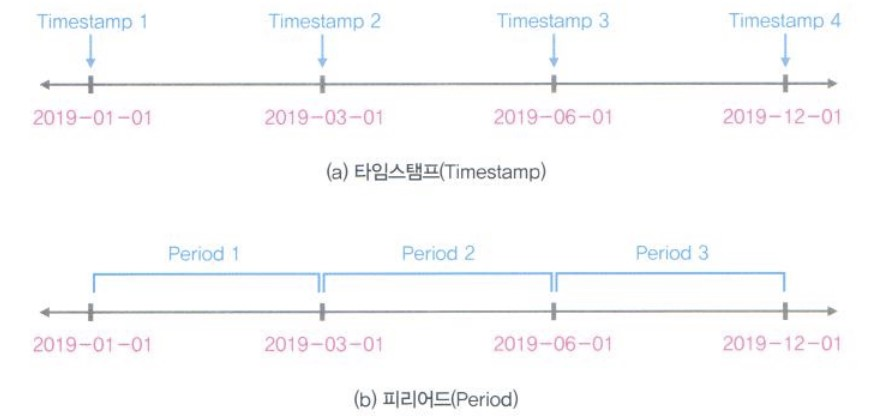

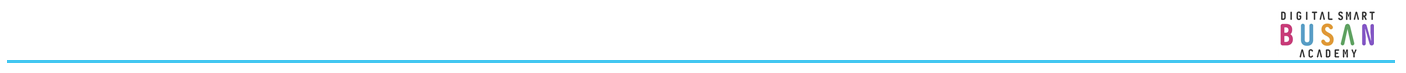

## 6-1 다른 자료형을 시계열 객체로 변환

### 1. 문자열을 Timestamp(판다스 시계열 객체)로 변환
* to_datetime() 함수를 사용하면 문자열 등 다른 자료형을 판다스 Timestamp를 나타내는 datetime64 자료형으로 변환 가능

In [ ]:
# <예제 5-15> 문자열을 Timestamp로 변환
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import pandas as pd

# read_csv() 함수로 CSV 파일을 가져와서 df로 변환
df = pd.read_csv('stock-data.csv')

# 데이터 내용 및 자료형 자료형 확인
print(df.head())
print('\n')
print(df.info())

         Date  Close  Start   High    Low  Volume
0  2018-07-02  10100  10850  10900  10000  137977
1  2018-06-29  10700  10550  10900   9990  170253
2  2018-06-28  10400  10900  10950  10150  155769
3  2018-06-27  10900  10800  11050  10500  133548
4  2018-06-26  10800  10900  11000  10700   63039


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    20 non-null     object
 1   Close   20 non-null     int64 
 2   Start   20 non-null     int64 
 3   High    20 non-null     int64 
 4   Low     20 non-null     int64 
 5   Volume  20 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.1+ KB
None


In [ ]:
# 문자열 데이터(시리즈 객체)를 판다스 Timestamp로 변환
df['new_Date'] = pd.to_datetime(df['Date'])   #df에 새로운 열로 추가

# 데이터 내용 및 자료형 자료형 확인
print(df.head())
print('\n')
print(df.info())
print('\n')
print(type(df['new_Date'][0]))

         Date  Close  Start   High    Low  Volume   new_Date
0  2018-07-02  10100  10850  10900  10000  137977 2018-07-02
1  2018-06-29  10700  10550  10900   9990  170253 2018-06-29
2  2018-06-28  10400  10900  10950  10150  155769 2018-06-28
3  2018-06-27  10900  10800  11050  10500  133548 2018-06-27
4  2018-06-26  10800  10900  11000  10700   63039 2018-06-26


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      20 non-null     object        
 1   Close     20 non-null     int64         
 2   Start     20 non-null     int64         
 3   High      20 non-null     int64         
 4   Low       20 non-null     int64         
 5   Volume    20 non-null     int64         
 6   new_Date  20 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 1.2+ KB
None


<class 'pandas._libs.tslibs.timestamps.T

In [ ]:
# 시계열 값으로 변환된 열을 새로운 행 인덱스로 지정. 기존 날짜 열은 삭제
df.set_index('new_Date', inplace=True)
df.drop('Date', axis=1, inplace=True)

# 데이터 내용 및 자료형 자료형 확인
print(df.head())
print('\n')
print(df.info())

            Close  Start   High    Low  Volume
new_Date                                      
2018-07-02  10100  10850  10900  10000  137977
2018-06-29  10700  10550  10900   9990  170253
2018-06-28  10400  10900  10950  10150  155769
2018-06-27  10900  10800  11050  10500  133548
2018-06-26  10800  10900  11000  10700   63039


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2018-07-02 to 2018-06-01
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Close   20 non-null     int64
 1   Start   20 non-null     int64
 2   High    20 non-null     int64
 3   Low     20 non-null     int64
 4   Volume  20 non-null     int64
dtypes: int64(5)
memory usage: 960.0 bytes
None


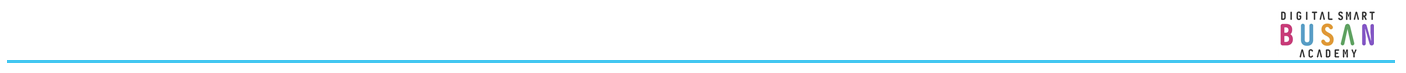

### 2. Timestamp를 Period로 변환
* 판다스 to_period() 함수를 이용하면 일정한 기간을 나타내는 Period 객체로 Timestamp 객체를 변환할 수 있다.
* DatetimeIndex가 PeriodIndex로 변환되고, 자료형은 datetime64에서 period으로 변환
* freq 옵션에 기준이 되는 기간을 설정
  * 'D'로 지정할 경우 1일의 기간
  * 'M'은 1개월의 기간
  * 'A'는 1년의 기간(1년이 끝나는 12월을 기준으로 삼는다.)

In [ ]:
# <예제 5-16> Timestamp를 Period로 변환
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import pandas as pd

# 날짜 형식의 문자열로 구성되는 리스트 정의
dates = ['2019-01-01', '2020-03-01', '2021-06-01']

# 문자열 데이터(시리즈 객체)를 판다스 Timestamp로 변환
ts_dates = pd.to_datetime(dates)
print(ts_dates)
print('\n')

# Timestamp를 Period로 변환
pr_day = ts_dates.to_period(freq='D')
print(pr_day)
pr_month = ts_dates.to_period(freq='M')
print(pr_month)
pr_year = ts_dates.to_period(freq='A')
print(pr_year)

DatetimeIndex(['2019-01-01', '2020-03-01', '2021-06-01'], dtype='datetime64[ns]', freq=None)


PeriodIndex(['2019-01-01', '2020-03-01', '2021-06-01'], dtype='period[D]')
PeriodIndex(['2019-01', '2020-03', '2021-06'], dtype='period[M]')
PeriodIndex(['2019', '2020', '2021'], dtype='period[A-DEC]')


* freq 옵션의 종류

|옵션|설명|옵션|설명|
|----|----|----|----|
|D|day(1일)|B|business day(휴일 제외)|
|W|week(1주)|H|hour(1시간)|
|M|month end(월말)|T|minute(1분)|
|MS|month begin(월초)|S|second(1초)|
|Q|quarter end(분기말)|L|millisecond(1/1,000초)|
|QS|quarter begin(분기초)|U|microsecond(1/1,000,000초)|
|A|year end(연말)|N|nanosecond(1,000,000,000초)|
|AS|year begin(연초)|...|...|

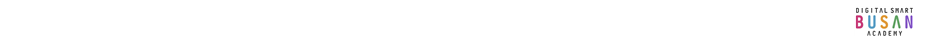

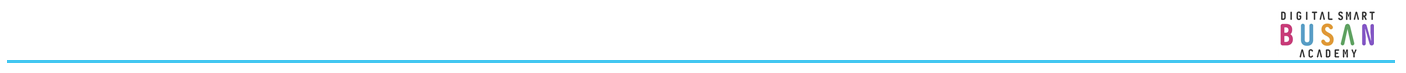

## 6-2 시계열 데이터 만들기
### 1. Timestamp 배열
* 판다스 date_range() 함수를 사용하면 여러 개의 날짜(Timestemp)가 들어 있는 배열 형태의 시계열 데이터를 만들 수 있다.

In [ ]:
# <예제 5-17> Timestamp 배열 만들기
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import pandas as pd

# Timestamp의 배열 만들기 - 월 간격, 월의 시작일 기준
ts_ms = pd.date_range(start='2019-01-01',    # 날짜 범위의 시작
                   end=None,                 # 날짜 범위의 끝
                   periods=6,                # 생성할 Timestamp의 개수
                   freq='MS',                # 시간 간격 (MS: 월의 시작일)
                   tz='Asia/Seoul')          # 시간대(timezone)
print(ts_ms)

DatetimeIndex(['2019-01-01 00:00:00+09:00', '2019-02-01 00:00:00+09:00',
               '2019-03-01 00:00:00+09:00', '2019-04-01 00:00:00+09:00',
               '2019-05-01 00:00:00+09:00', '2019-06-01 00:00:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq='MS')


In [ ]:
# 월 간격, 월의 마지막 날 기준
ts_me = pd.date_range('2019-01-01', periods=6,
                   freq='M',              # 시간 간격 (M: 월의 마지막 날)
                   tz='Asia/Seoul')       # 시간대(timezone)
print(ts_me)
print('\n')

# 분기(3개월) 간격, 월의 마지막 날 기준
ts_3m = pd.date_range('2019-01-01', periods=6,
                   freq='3M',             # 시간 간격 (3M: 3개월)
                   tz='Asia/Seoul')       # 시간대(timezone)
print(ts_3m)


DatetimeIndex(['2019-01-31 00:00:00+09:00', '2019-02-28 00:00:00+09:00',
               '2019-03-31 00:00:00+09:00', '2019-04-30 00:00:00+09:00',
               '2019-05-31 00:00:00+09:00', '2019-06-30 00:00:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq='M')


DatetimeIndex(['2019-01-31 00:00:00+09:00', '2019-04-30 00:00:00+09:00',
               '2019-07-31 00:00:00+09:00', '2019-10-31 00:00:00+09:00',
               '2020-01-31 00:00:00+09:00', '2020-04-30 00:00:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq='3M')


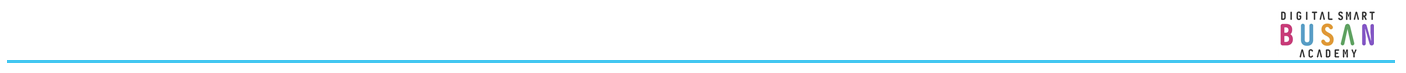

### 3. Period 배열
* 판다스 period_range() 함수는 여러 개의 기간(Period)이 들어 있는 시계열 데이터를 만든다,

In [ ]:
# <예제 5-18> Period 배열 만들기
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import pandas as pd

# Period 배열 만들기 - 1개월 길이
pr_m = pd.period_range(start='2019-01-01',     # 날짜 범위의 시작
                   end=None,                   # 날짜 범위의 끝
                   periods=3,                  # 생성할 Period 개수
                   freq='M')                   # 기간의 길이 (M: 월)
print(pr_m)

PeriodIndex(['2019-01', '2019-02', '2019-03'], dtype='period[M]')


In [ ]:
# Period 배열 만들기 - 1시간 길이
pr_h = pd.period_range(start='2019-01-01',     # 날짜 범위의 시작
                   end=None,                   # 날짜 범위의 끝
                   periods=3,                  # 생성할 Period 개수
                   freq='H')                   # 기간의 길이 (H: 시간)
print(pr_h)
print('\n')

# Period 배열 만들기 - 2시간 길이
pr_2h = pd.period_range(start='2019-01-01',    # 날짜 범위의 시작
                   end=None,                   # 날짜 범위의 끝
                   periods=3,                  # 생성할 Period 개수
                   freq='2H')                  # 기간의 길이 (H: 시간)
print(pr_2h)

PeriodIndex(['2019-01-01 00:00', '2019-01-01 01:00', '2019-01-01 02:00'], dtype='period[H]')


PeriodIndex(['2019-01-01 00:00', '2019-01-01 02:00', '2019-01-01 04:00'], dtype='period[2H]')


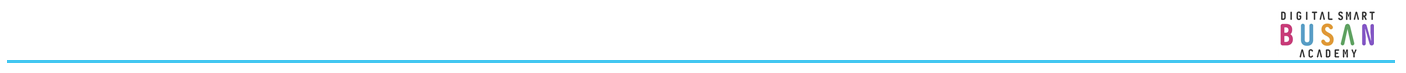

## 6-3 시계열 데이터 활용
### 1. 날짜 데이터 분리
* 연-월-일 날짜 데이터에서 일부를 분리하여 추출할 수 있다.
* 먼저 연-월-일 정보를 연, 월, 일 가각으로 구분하는 방법

In [ ]:
# <예제 5-19> 날짜 데이터 분리
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import pandas as pd

# read_csv() 함수로 파일 읽어와서 df로 변환
df = pd.read_csv('stock-data.csv')

# 문자열인 날짜 데이터를 판다스 Timestamp로 변환
df['new_Date'] = pd.to_datetime(df['Date'])   #df에 새로운 열로 추가
print(df.head())
print('\n')

# dt 속성을 이용하여 new_Date 열의 년월일 정보를 년, 월, 일로 구분
df['Year'] = df['new_Date'].dt.year
df['Month'] = df['new_Date'].dt.month
df['Day'] = df['new_Date'].dt.day
print(df.head())

         Date  Close  Start   High    Low  Volume   new_Date
0  2018-07-02  10100  10850  10900  10000  137977 2018-07-02
1  2018-06-29  10700  10550  10900   9990  170253 2018-06-29
2  2018-06-28  10400  10900  10950  10150  155769 2018-06-28
3  2018-06-27  10900  10800  11050  10500  133548 2018-06-27
4  2018-06-26  10800  10900  11000  10700   63039 2018-06-26


         Date  Close  Start   High    Low  Volume   new_Date  Year  Month  Day
0  2018-07-02  10100  10850  10900  10000  137977 2018-07-02  2018      7    2
1  2018-06-29  10700  10550  10900   9990  170253 2018-06-29  2018      6   29
2  2018-06-28  10400  10900  10950  10150  155769 2018-06-28  2018      6   28
3  2018-06-27  10900  10800  11050  10500  133548 2018-06-27  2018      6   27
4  2018-06-26  10800  10900  11000  10700   63039 2018-06-26  2018      6   26


In [ ]:
# Timestamp를 Period로 변환하여 년월일 표기 변경하기
df['Date_yr'] = df['new_Date'].dt.to_period(freq='A')
df['Date_m'] = df['new_Date'].dt.to_period(freq='M')
print(df.head())

         Date  Close  Start   High    Low  Volume   new_Date  Year  Month  \
0  2018-07-02  10100  10850  10900  10000  137977 2018-07-02  2018      7   
1  2018-06-29  10700  10550  10900   9990  170253 2018-06-29  2018      6   
2  2018-06-28  10400  10900  10950  10150  155769 2018-06-28  2018      6   
3  2018-06-27  10900  10800  11050  10500  133548 2018-06-27  2018      6   
4  2018-06-26  10800  10900  11000  10700   63039 2018-06-26  2018      6   

   Day Date_yr   Date_m  
0    2    2018  2018-07  
1   29    2018  2018-06  
2   28    2018  2018-06  
3   27    2018  2018-06  
4   26    2018  2018-06  


In [ ]:
# 원하는 열을 새로운 행 인덱스로 지정
df.set_index('Date_m', inplace=True)
print(df.head())

               Date  Close  Start   High    Low  Volume   new_Date  Year  \
Date_m                                                                     
2018-07  2018-07-02  10100  10850  10900  10000  137977 2018-07-02  2018   
2018-06  2018-06-29  10700  10550  10900   9990  170253 2018-06-29  2018   
2018-06  2018-06-28  10400  10900  10950  10150  155769 2018-06-28  2018   
2018-06  2018-06-27  10900  10800  11050  10500  133548 2018-06-27  2018   
2018-06  2018-06-26  10800  10900  11000  10700   63039 2018-06-26  2018   

         Month  Day Date_yr  
Date_m                       
2018-07      7    2    2018  
2018-06      6   29    2018  
2018-06      6   28    2018  
2018-06      6   27    2018  
2018-06      6   26    2018  


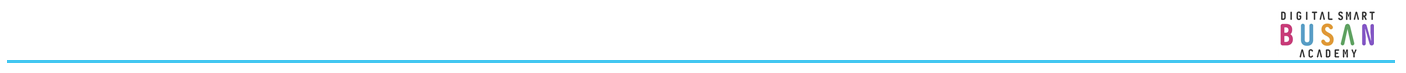

### 2. 날짜 인덱스 활용
* 날짜 인덱스를 활용하면 시계열 데이터에 대한 인덱싱과 슬라이싱이 편리
  * Timestamp로 구성된 열을 행 인덱스를 지정하면 DatetimeIndex라는 고유 속성으로 변환
  * Period로 구성된 열을 행 인덱스로 지정하면 PeriodIndex라는 속성을 갖는다.

In [ ]:
# <예제 5-20> 날짜 인덱스 활용
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import pandas as pd

# read_csv() 함수로 파일 읽어와서 df로 변환
df = pd.read_csv('stock-data.csv')

# 문자열인 날짜 데이터를 판다스 Timestamp로 변환
df['new_Date'] = pd.to_datetime(df['Date'])   # 새로운 열에 추가
df.set_index('new_Date', inplace=True)        # 행 인덱스로 지정

print(df.head())
print('\n')
print(df.index)

                  Date  Close  Start   High    Low  Volume
new_Date                                                  
2018-07-02  2018-07-02  10100  10850  10900  10000  137977
2018-06-29  2018-06-29  10700  10550  10900   9990  170253
2018-06-28  2018-06-28  10400  10900  10950  10150  155769
2018-06-27  2018-06-27  10900  10800  11050  10500  133548
2018-06-26  2018-06-26  10800  10900  11000  10700   63039


DatetimeIndex(['2018-07-02', '2018-06-29', '2018-06-28', '2018-06-27',
               '2018-06-26', '2018-06-25', '2018-06-22', '2018-06-21',
               '2018-06-20', '2018-06-19', '2018-06-18', '2018-06-15',
               '2018-06-14', '2018-06-12', '2018-06-11', '2018-06-08',
               '2018-06-07', '2018-06-05', '2018-06-04', '2018-06-01'],
              dtype='datetime64[ns]', name='new_Date', freq=None)


In [ ]:
# loc 인덱서 활용하여 데이터 선택하기 (교재 수정)
df_y = df.loc['2018']
print(df_y.head())
print('\n')
df_ym = df.loc['2018-07']
print(df_ym)
print('\n')
df_ym_cols = df.loc['2018-07', 'Start':'High']    # 열 범위 슬라이싱
print(df_ym_cols)
print('\n')
df_ymd = df.loc['2018-07-02']
print(df_ymd)
print('\n')
df_ymd_range = df.loc['2018-06-20':'2018-06-25']    # 날짜 범위 지정
print(df_ymd_range)

                  Date  Close  Start   High    Low  Volume
new_Date                                                  
2018-07-02  2018-07-02  10100  10850  10900  10000  137977
2018-06-29  2018-06-29  10700  10550  10900   9990  170253
2018-06-28  2018-06-28  10400  10900  10950  10150  155769
2018-06-27  2018-06-27  10900  10800  11050  10500  133548
2018-06-26  2018-06-26  10800  10900  11000  10700   63039


                  Date  Close  Start   High    Low  Volume
new_Date                                                  
2018-07-02  2018-07-02  10100  10850  10900  10000  137977


            Start   High
new_Date                
2018-07-02  10850  10900


Date      2018-07-02
Close          10100
Start          10850
High           10900
Low            10000
Volume        137977
Name: 2018-07-02 00:00:00, dtype: object


                  Date  Close  Start   High    Low  Volume
new_Date                                                  
2018-06-25  2018-06-25  11150  11400  1145

In [ ]:
# 시간 간격 계산. 최근 180일 ~ 189일 사이의 값들만 선택하기
today = pd.to_datetime('2018-12-25')            # 기준일 생성
df['time_delta'] = today - df.index             # 날짜 차이 계산
df.set_index('time_delta', inplace=True)        # 행 인덱스로 지정
df_180 = df['180 days':'189 days']
print(df_180)

                  Date  Close  Start   High    Low  Volume
time_delta                                                
180 days    2018-06-28  10400  10900  10950  10150  155769
181 days    2018-06-27  10900  10800  11050  10500  133548
182 days    2018-06-26  10800  10900  11000  10700   63039
183 days    2018-06-25  11150  11400  11450  11000   55519
186 days    2018-06-22  11300  11250  11450  10750  134805
187 days    2018-06-21  11200  11350  11750  11200  133002
188 days    2018-06-20  11550  11200  11600  10900  308596
189 days    2018-06-19  11300  11850  11950  11300  180656


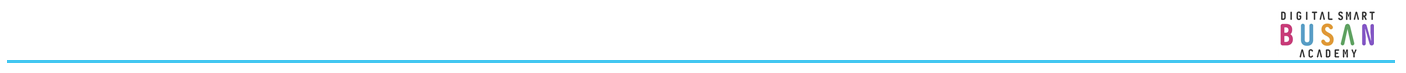